In [8]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import backtrader as bt
import plotly.io as pio
import datetime
pio.renderers.default = 'iframe_connected'

# BTCUSDT exploratory data Analysis
**The minute bar data is in `~/backtesting/crypto_data`**

In [9]:
CRYPTO_DATA_CSV_PATH = Path('/home/sgutierrez/backTesting/crypto_data')
BTCUSDT_CSV_FILE = CRYPTO_DATA_CSV_PATH / 'BTCUSDT_MinuteBars.csv'

btcusdt_pd = pd.read_csv(BTCUSDT_CSV_FILE)
btcusdt_pd = btcusdt_pd.drop(columns=['ignore', 'tb_base_av', 'tb_quote_av', 'quote_av', 'trdes'])
btcusdt_pd.tail()

,timestamp,open,high,low,close,volume,close_time
2255650,2021-12-06 11:31:00,47529.30,47597.33,47504.34,47541.71,37.98913,1638790319999
2255651,2021-12-06 11:32:00,47541.71,47627.58,47541.52,47600.00,254.15955,1638790379999
2255652,2021-12-06 11:33:00,47600.00,47610.67,47550.42,47565.88,93.12816,1638790439999
2255653,2021-12-06 11:34:00,47565.88,47565.88,47512.42,47521.59,30.57731,1638790499999
2255654,2021-12-06 11:35:00,47521.60,47521.60,47466.30,47485.00,57.54889,1638790559999


Adding data to Cerebro
Running
Plotting


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 2 Axes>]]

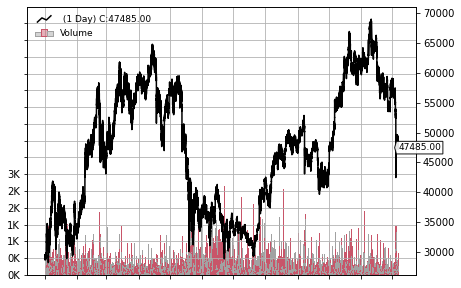

In [10]:
#btcusdt_pd.describe()

btcusdt_pd['timestamp'] = btcusdt_pd['timestamp'].apply(lambda x: x.split('.')[0])
btcusdt_pd.timestamp = pd.to_datetime(btcusdt_pd.timestamp, format='%Y-%m-%d %H:%M:%S')
cerebro = bt.Cerebro(stdstats=False)
cerebro.addstrategy(bt.Strategy)
data = bt.feeds.PandasData(
    dataname=btcusdt_pd,
    datetime='timestamp',
    fromdate=datetime.datetime(2019,1,1))
print("Adding data to Cerebro")
cerebro.adddata(data)
cerebro.broker.setcash(10000)
cerebro.addsizer(bt.sizers.FixedSize, stake=10)

print("Running")
cerebro.run()
print("Plotting")
cerebro.plot(iplot=True, width=864, height=576, start=datetime.datetime(2021,1,1))